In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
!unzip data.zip

In [ ]:
classes = ['batima', 'botinha', 'linco', 'nico', 'peto']

In [ ]:
seed = 2001493316
batch_size = 32
dataset = 'data'
epochs = 8

In [ ]:
# load dataset
train_data, validation_data = tf.keras.preprocessing.image_dataset_from_directory(
      dataset,
      validation_split=0.2,
      subset="both",
      seed=seed,
      image_size=(40, 30),
      batch_size=batch_size,
      label_mode="categorical",
)

Found 278 files belonging to 5 classes.
Using 223 files for training.
Using 55 files for validation.


In [ ]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(40, 30, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')
        ])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(train_data, epochs=epochs, validation_data=validation_data)

Epoch 1/8
7/7 [==============================] - 2s 108ms/step - loss: 20.4770 - accuracy: 0.3857 - val_loss: 5.8256 - val_accuracy: 0.5091
Epoch 2/8
7/7 [==============================] - 1s 85ms/step - loss: 2.4959 - accuracy: 0.5964 - val_loss: 1.2309 - val_accuracy: 0.6364
Epoch 3/8
7/7 [==============================] - 1s 86ms/step - loss: 0.9197 - accuracy: 0.6861 - val_loss: 0.7528 - val_accuracy: 0.7455
Epoch 4/8
7/7 [==============================] - 1s 76ms/step - loss: 0.5394 - accuracy: 0.8161 - val_loss: 0.6506 - val_accuracy: 0.7091
Epoch 5/8
7/7 [==============================] - 1s 80ms/step - loss: 0.3256 - accuracy: 0.8834 - val_loss: 0.4564 - val_accuracy: 0.8364
Epoch 6/8
7/7 [==============================] - 2s 132ms/step - loss: 0.2006 - accuracy: 0.9507 - val_loss: 0.3339 - val_accuracy: 0.8727
Epoch 7/8
7/7 [==============================] - 1s 79ms/step - loss: 0.1143 - accuracy: 0.9641 - val_loss: 0.3928 - val_accuracy: 0.8909
Epoch 8/8
7/7 [================

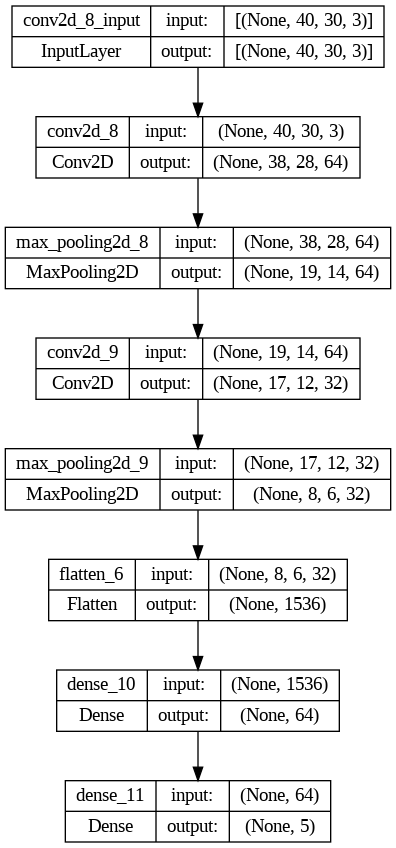

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
predictions = model.predict(validation_data)
predictions = np.array([np.argmax(pred) for pred in predictions])

2/2 [==============================] - 0s 75ms/step


In [ ]:
predictions.shape

(55,)

In [ ]:
validation_labels = []

for _, labels in validation_data:
    validation_labels.extend(labels.numpy())

validation_labels = np.array([np.argmax(label) for label in validation_labels])

In [ ]:
validation_labels.shape

(55,)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(validation_labels, predictions)

<Axes: >

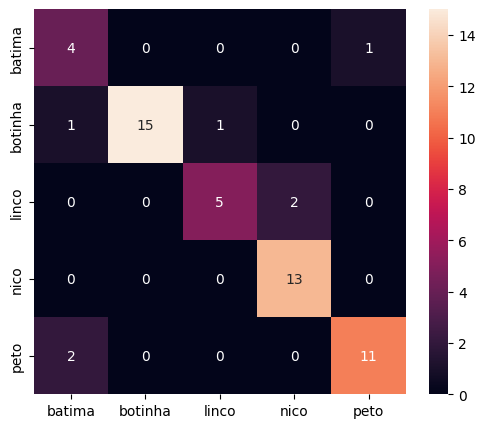

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (6, 5))
sns.heatmap(df_cm, annot=True, fmt=".0f")